In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute  import SimpleImputer

In [3]:
df = pd.read_csv('oasis_longitudinal.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [4]:
dfcs = pd.read_csv('oasis_cross-sectional.csv')
dfcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [5]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
dfcs.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [7]:
print(df.shape)
print(dfcs.shape)

(373, 15)
(436, 12)


In [8]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [9]:
dfcs.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [10]:
group_map = {0:"Nondemented", 1:"Demented", 2:"Converted"}
dfcs['Group'] = dfcs['CDR'].map(group_map)
dfcs.Group.value_counts()

Group
Nondemented    135
Demented        28
Converted        2
Name: count, dtype: int64

In [11]:
dfcs.dropna(subset=['Group'],inplace=True)
dfcs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 0 to 415
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      165 non-null    object 
 1   M/F     165 non-null    object 
 2   Hand    165 non-null    object 
 3   Age     165 non-null    int64  
 4   Educ    165 non-null    float64
 5   SES     159 non-null    float64
 6   MMSE    165 non-null    float64
 7   CDR     165 non-null    float64
 8   eTIV    165 non-null    int64  
 9   nWBV    165 non-null    float64
 10  ASF     165 non-null    float64
 11  Delay   0 non-null      float64
 12  Group   165 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 18.0+ KB


In [12]:
dfcs.drop(columns=['ID','Delay'],inplace=True)

df = df.rename(columns={'EDUC':'Educ'})
df.drop(columns=['Subject ID','MRI ID','Visit','MR Delay'],inplace=True)

dataf = pd.concat([dfcs,df])
dataf.rename(columns={"M/F" : "Gender"}, inplace=True)

dataf = dataf.reset_index()

print(dataf.head())
dataf.info()

   index Gender Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0      0      F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1      1      F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2      8      M    R   74   5.0  2.0  30.0  0.0  1636  0.689  1.073   
3      9      F    R   52   3.0  2.0  30.0  0.0  1321  0.827  1.329   
4     11      F    R   81   5.0  2.0  30.0  0.0  1664  0.679  1.055   

         Group  
0  Nondemented  
1  Nondemented  
2  Nondemented  
3  Nondemented  
4  Nondemented  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   538 non-null    int64  
 1   Gender  538 non-null    object 
 2   Hand    538 non-null    object 
 3   Age     538 non-null    int64  
 4   Educ    538 non-null    float64
 5   SES     513 non-null    float64
 6   MMSE    536 non-null    float64
 7   CDR     538 non-null    floa

In [13]:
dataf

,index,Gender,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,Nondemented
1,1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,Nondemented
2,8,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,Nondemented
3,9,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,Nondemented
4,11,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,Nondemented
...,...,...,...,...,...,...,...,...,...,...,...,...
533,368,M,R,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,Demented
534,369,M,R,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,Demented
535,370,F,R,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,Nondemented
536,371,F,R,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,Nondemented


In [14]:
dataf.columns

Index(['index', 'Gender', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Group'],
      dtype='object')

In [15]:
dataf.shape

(538, 12)

In [16]:
dataf.describe()

,index,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,538.000000,538.000000,538.000000,513.000000,536.000000,538.000000,538.000000,538.000000,538.000000
mean,192.799257,75.078067,11.126394,2.450292,27.442164,0.261152,1475.981413,0.738134,1.204158
std,112.157182,10.159686,5.792406,1.127586,3.663971,0.393282,168.624371,0.043460,0.133887
min,0.000000,33.000000,1.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,96.250000,70.000000,5.000000,2.000000,27.000000,0.000000,1353.250000,0.703250,1.119000
50%,192.500000,76.000000,12.000000,2.000000,29.000000,0.000000,1460.000000,0.736500,1.202000
75%,288.750000,82.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.768750,1.297000
max,415.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.847000,1.587000


In [17]:
print(dataf.Hand.value_counts())
dataf.Group.value_counts()

Hand
R    538
Name: count, dtype: int64


Group
Nondemented    325
Demented       174
Converted       39
Name: count, dtype: int64

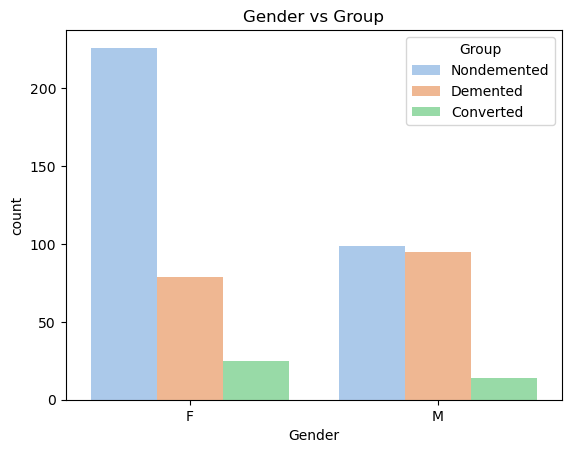

In [229]:
working = dataf

sns.countplot(x="Gender", data=working, hue="Group",palette="pastel")
plt.title("Gender vs Group")
plt.show()

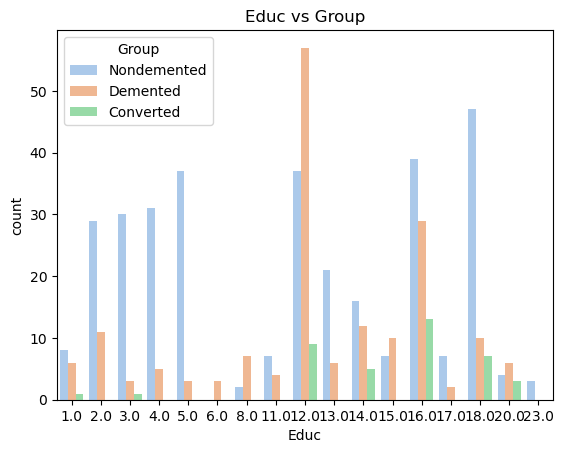

In [230]:
sns.countplot(x="Educ", hue="Group", data=working,palette="pastel")
plt.title("Educ vs Group")
plt.show()

<Axes: xlabel='Group', ylabel='count'>

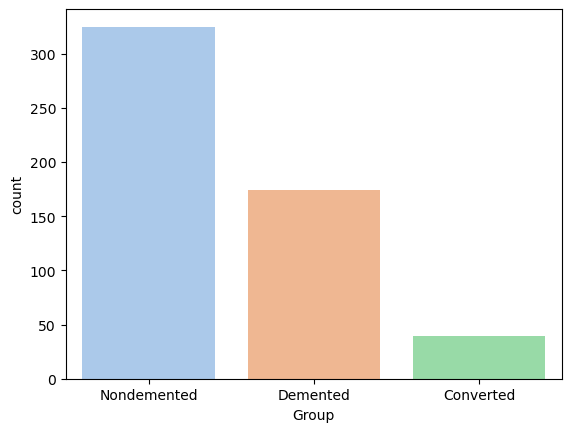

In [231]:
sns.countplot(x="Group", data=working,palette="pastel")

In [18]:
imputer = SimpleImputer ( missing_values = np.nan,strategy='mean')
imputer.fit(dataf[['SES']])
dataf[['SES']] = imputer.fit_transform(dataf[['SES']])

imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(dataf[['MMSE']])
dataf[['MMSE']] = imputer.fit_transform(dataf[['MMSE']])
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   538 non-null    int64  
 1   Gender  538 non-null    object 
 2   Hand    538 non-null    object 
 3   Age     538 non-null    int64  
 4   Educ    538 non-null    float64
 5   SES     538 non-null    float64
 6   MMSE    538 non-null    float64
 7   CDR     538 non-null    float64
 8   eTIV    538 non-null    int64  
 9   nWBV    538 non-null    float64
 10  ASF     538 non-null    float64
 11  Group   538 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 50.6+ KB


In [19]:
dataf.isnull().sum()

index     0
Gender    0
Hand      0
Age       0
Educ      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
Group     0
dtype: int64

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(50.0, 100.0)

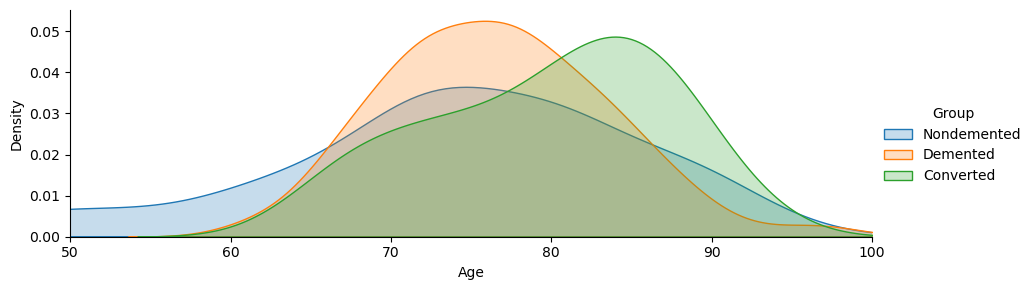

In [36]:
facet= sns.FacetGrid(dataf,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


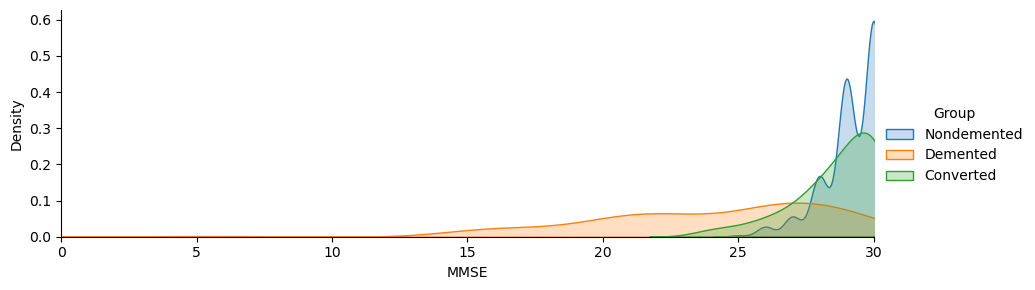

In [37]:
facet= sns.FacetGrid(dataf,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',fill= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


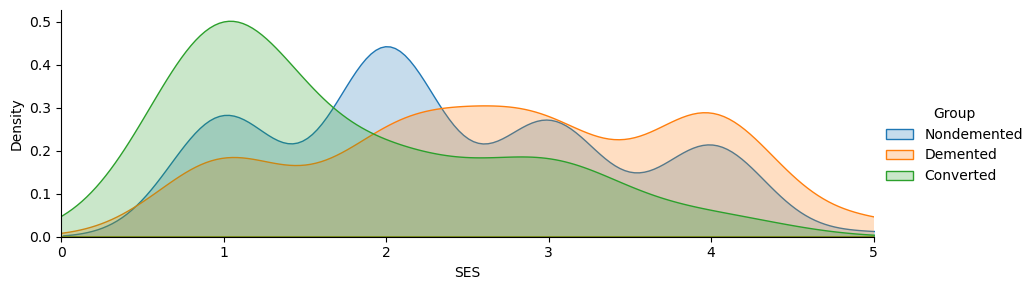

In [38]:
facet= sns.FacetGrid(dataf,hue="Group", aspect=3)
facet.map(sns.kdeplot,'SES',fill= True)
facet.set(xlim=(0, df['SES'].max()))
facet.add_legend()

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


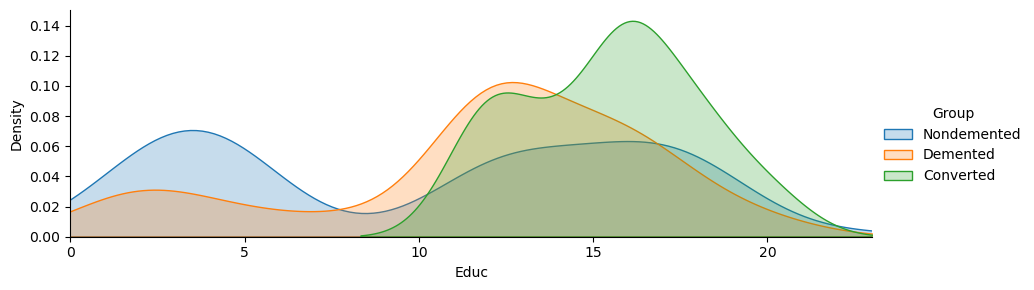

In [39]:
facet= sns.FacetGrid(dataf,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Educ',fill= True)
facet.set(xlim=(0, df['Educ'].max()))
facet.add_legend()

<Axes: xlabel='Group', ylabel='count'>

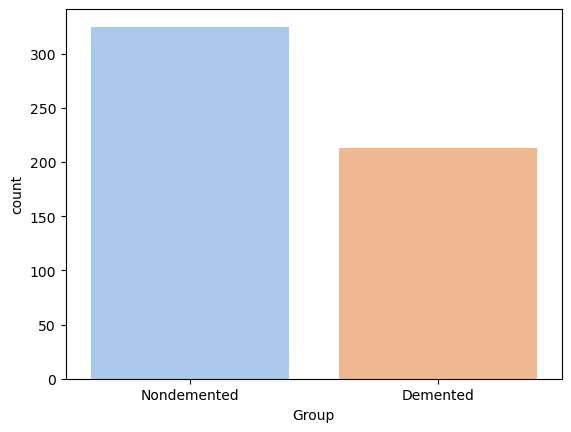

In [20]:
dataf['Group'] = dataf['Group'].replace('Converted', 'Demented')
working = dataf
sns.countplot(x="Group", data=working,palette="pastel")

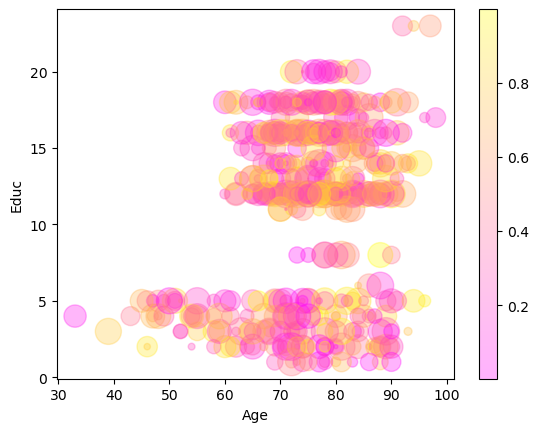

In [79]:
rng = np.random.RandomState(77)
colors = rng.rand(538)
sizes = 400* rng.rand(538)
plt.scatter(dataf['Age'], dataf['Educ'], c=colors, s=sizes, alpha=0.3,cmap='spring')
plt.xlabel('Age')
plt.ylabel('Educ')
plt.colorbar();

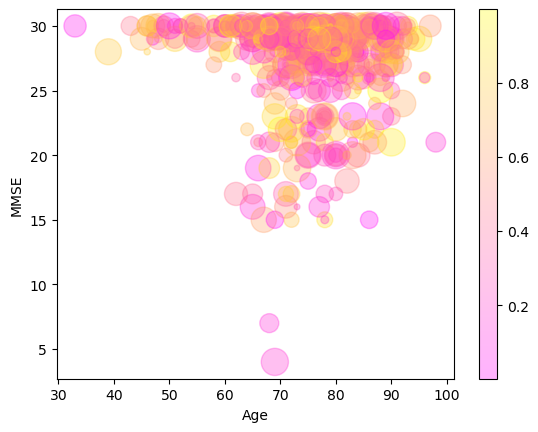

In [153]:
rng = np.random.RandomState(77)
colors = rng.rand(538)
sizes = 400* rng.rand(538)
plt.scatter(dataf['Age'], dataf['MMSE'], c=colors, s=sizes, alpha=0.3,cmap='spring')
plt.xlabel('Age')
plt.ylabel('MMSE')
plt.colorbar();

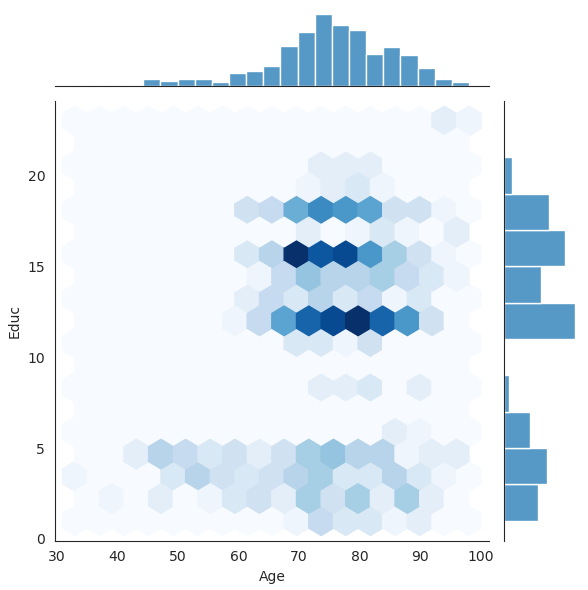

In [114]:
with sns.axes_style('white'):
    sns.jointplot(x="Age", y="Educ",data=dataf,kind='hex', cmap= 'Blues')

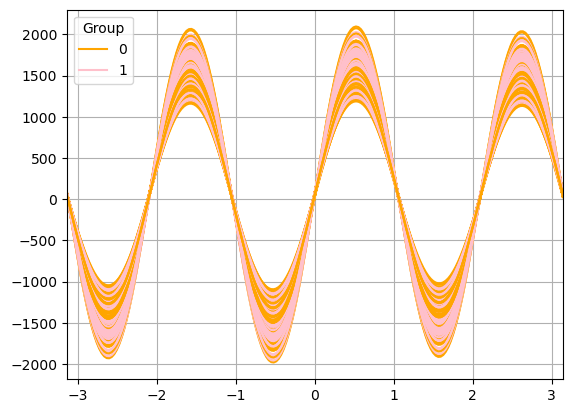

In [152]:
from pandas.plotting import andrews_curves
cols_to_plot = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
andrews_curves(dataf[cols_to_plot + ['Group']], "Group",color=['orange', 'pink'])
plt.legend(title='Group')
plt.show()

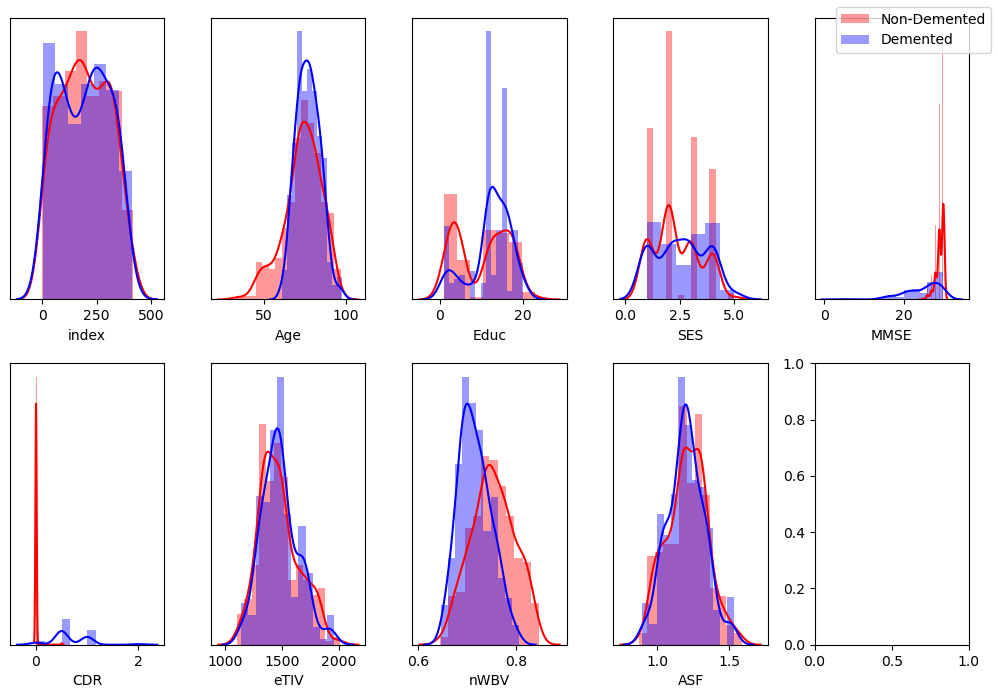

In [238]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,5,figsize=(10,7))

for idx,col in enumerate(dataf.select_dtypes(include=['float64','int64'])):
    sns.distplot(dataf[dataf["Group"]=='Nondemented'][col],label='Non-Demented',color='red',ax=axes[idx//5,idx%5])
    sns.distplot(dataf[dataf["Group"]=='Demented'][col],label='Demented',color='blue',ax=axes[idx//5,idx%5])
    axes[idx//5,idx%5].set_yticks([])
    axes[idx//5,idx%5].set_ylabel('')
fig.tight_layout()
fig.legend(labels=['Non-Demented',"_",'Demented',"_"])
fig.show()

<Figure size 400x400 with 0 Axes>

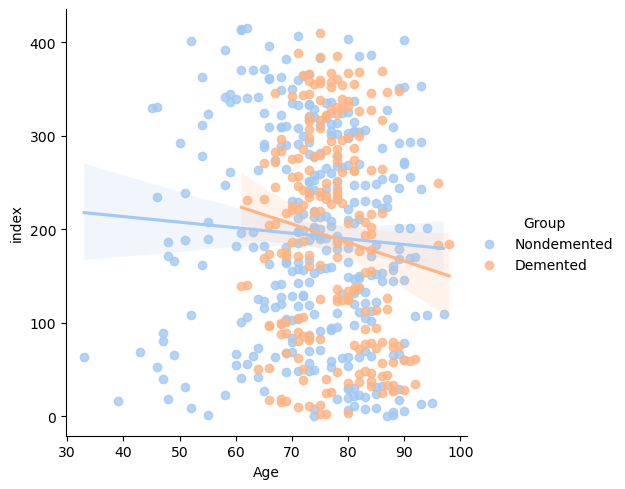

<Figure size 400x400 with 0 Axes>

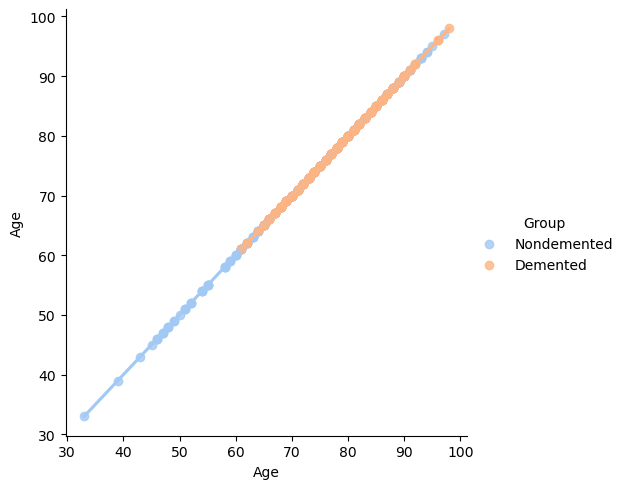

<Figure size 400x400 with 0 Axes>

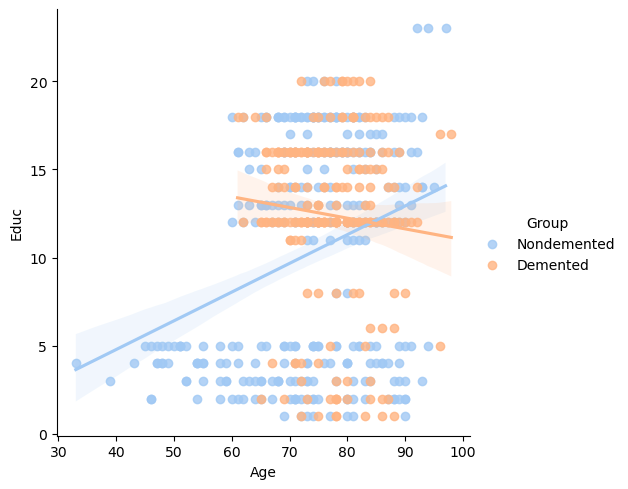

<Figure size 400x400 with 0 Axes>

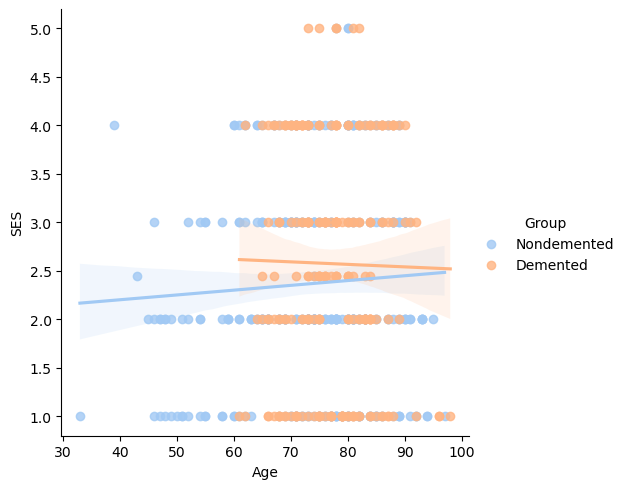

<Figure size 400x400 with 0 Axes>

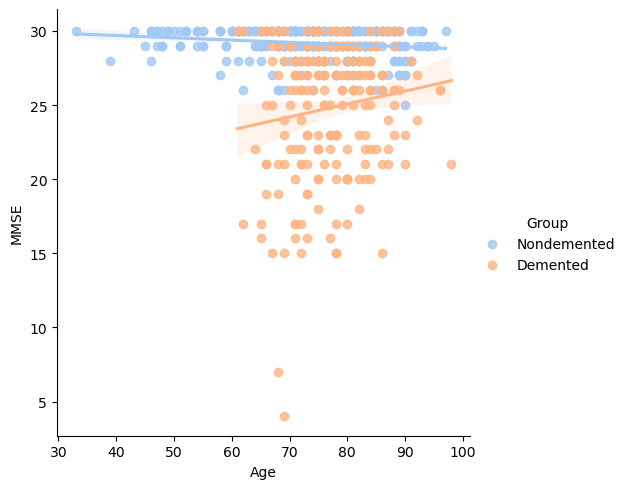

<Figure size 400x400 with 0 Axes>

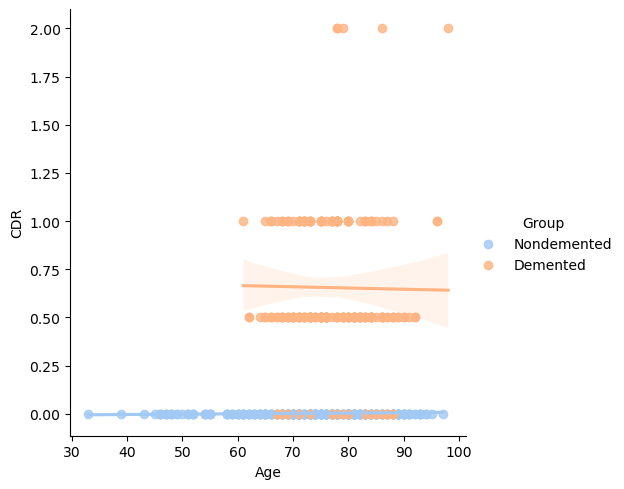

<Figure size 400x400 with 0 Axes>

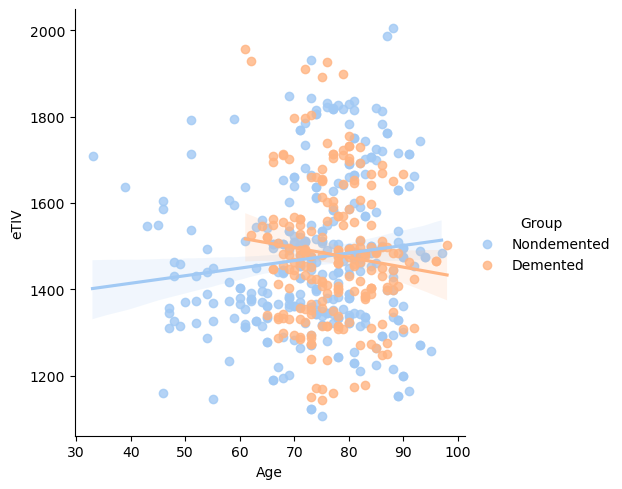

<Figure size 400x400 with 0 Axes>

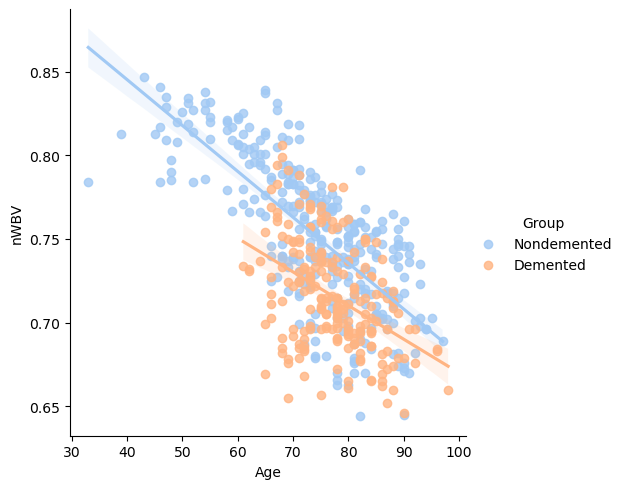

<Figure size 400x400 with 0 Axes>

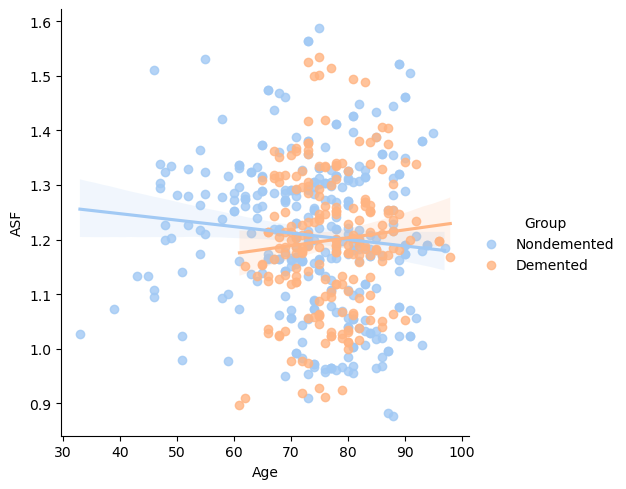

In [239]:
for col in dataf.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(4,4))
    sns.lmplot(x='Age', y=col, hue='Group', data=dataf,palette="pastel")

In [111]:
group_map = {"Demented": 1, "Nondemented": 0}

dataf['Group'] = dataf['Group'].map(group_map)
dataf['Gender'] = dataf['Gender'].replace(['F','M'], [0,1])

In [112]:
dataf

,index,Gender,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,0,0,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
1,1,0,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0
2,8,1,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0
3,9,0,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,0
4,11,0,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,0
...,...,...,...,...,...,...,...,...,...,...,...,...
533,368,1,R,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,1
534,369,1,R,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,1
535,370,0,R,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,0
536,371,0,R,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,0


In [113]:
le = LabelEncoder()
dataf['Hand'] = le.fit_transform(dataf['Hand'])

In [243]:
dataf

,index,Gender,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,0,0,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
1,1,0,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0
2,8,1,0,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0
3,9,0,0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,0
4,11,0,0,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,0
...,...,...,...,...,...,...,...,...,...,...,...,...
533,368,1,0,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,1
534,369,1,0,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,1
535,370,0,0,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,0
536,371,0,0,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,0


E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


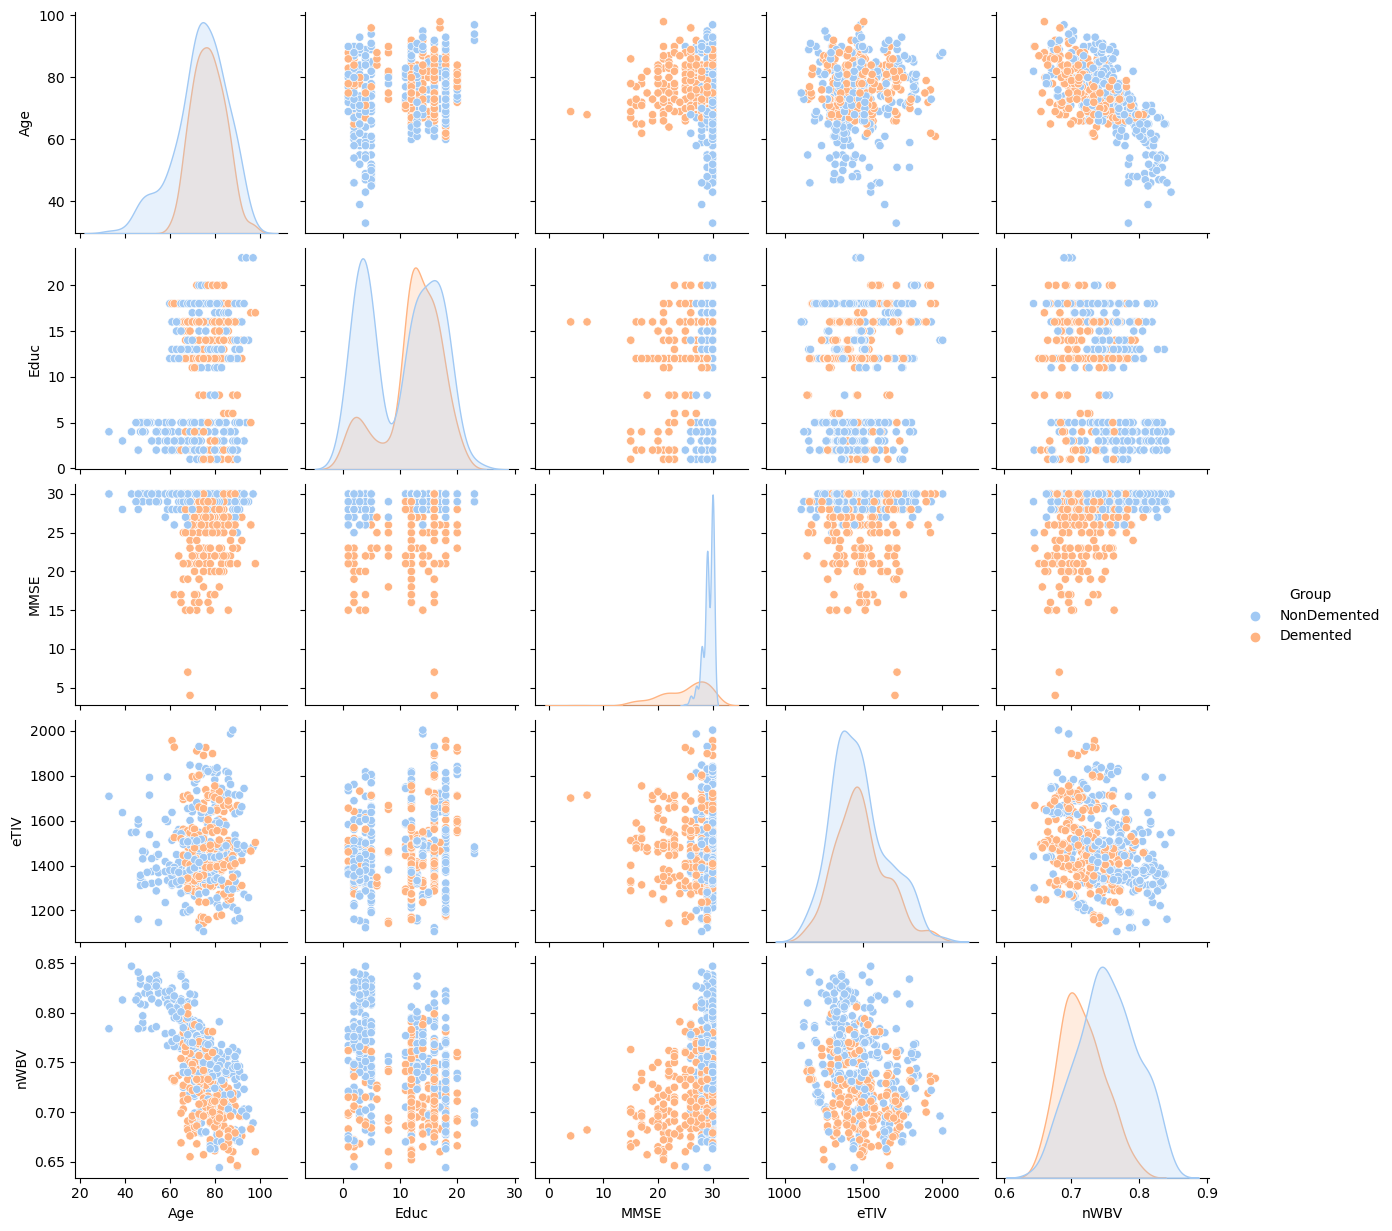

In [124]:
cols = ['Group','Age', 'Educ', 'MMSE', 'eTIV', 'nWBV']
df_encoded = dataf.copy()
df_encoded['Group'] = df_encoded['Group'].replace({0: 'NonDemented', 1: 'Demented'})
sns.pairplot(df_encoded[cols], hue="Group",palette="pastel",height=2.5)

In [245]:
dataf.columns

Index(['index', 'Gender', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Group'],
      dtype='object')

<Axes: >

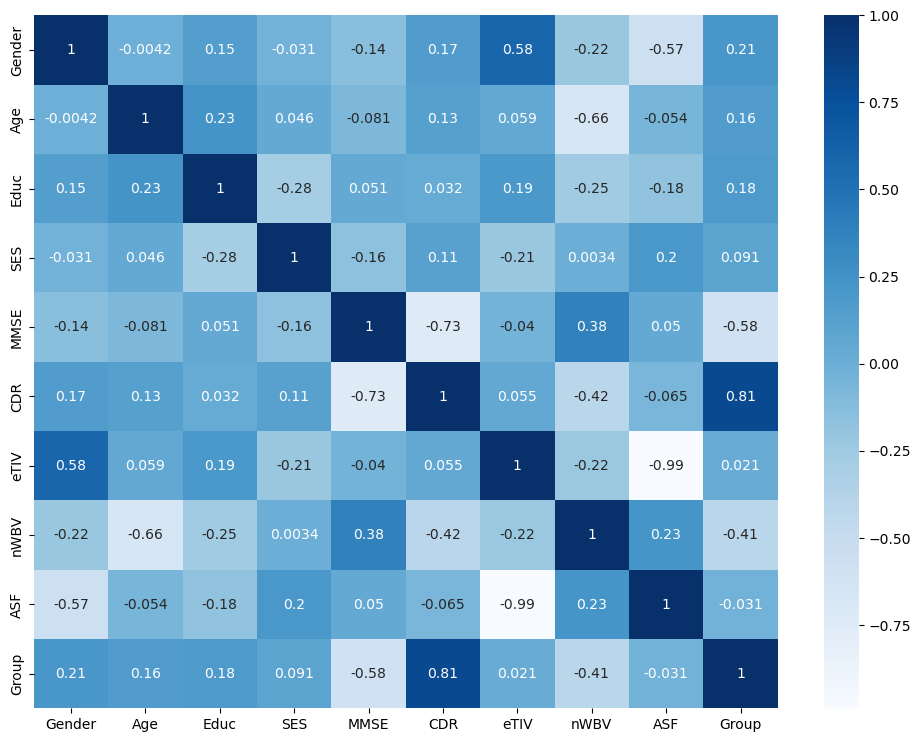

In [246]:
cor_cols = ['Gender', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF','Group']
cor_df = dataf[cor_cols]
cor = cor_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values, annot=True, cmap='Blues')

In [247]:
feature_col_names = ["Gender", "Age", "Educ", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_name = ['Group']
X = dataf[feature_col_names].values
y = dataf[predicted_class_name].values
X = StandardScaler().fit_transform(X)

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [249]:
print(len(X_train))
print(len(X_test))

430
108


# SVM

In [250]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [251]:
accuracy_train = svm.score(X_train, y_train)
print("Accuracy on the Train Set:", accuracy_train)

Accuracy on the Train Set: 0.8186046511627907


In [252]:
accuracy_test = svm.score(X_test, y_test)
print("Accuracy on the Test Set:", accuracy_test)

Accuracy on the Test Set: 0.9074074074074074


In [253]:
y_pred = svm.predict(X_test)

In [254]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.9074074074074074
Percentage :  90 %


In [261]:
kf = KFold(n_splits=5, shuffle=True, random_state=101)

In [262]:
cv_scores = []
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    svm.fit(X_train_fold, y_train_fold)
    
    score = svm.score(X_test_fold, y_test_fold)
    cv_scores.append(score)
print(cv_scores)

[0.9074074074074074, 0.7870370370370371, 0.8703703703703703, 0.7663551401869159, 0.8037383177570093]


In [272]:
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    plot_confusion_metrix(y_test, model_test)

In [273]:
def plot_confusion_metrix(y_test_best,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, alpha=0.7)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [276]:
from sklearn.metrics import RocCurveDisplay
def plotroccurve(model):
    RocCurveDisplay.from_predictions(
        y_test,
        y_pred,
        name=f"ROC",
        color="darkblue",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

In [269]:
accu = accuracy_score(y_test,y_pred)
y_test  = y_test.ravel()
results_df = pd.DataFrame({'Predicted': pred, 'Actual': y_test})
    
print("\nAcuuracy Of the Model: ",accu,"\n\n")
print("Predicted vs Actual:\n")
print(results_df)


Acuuracy Of the Model:  0.9074074074074074 


Predicted vs Actual:

     Predicted  Actual
0            1       1
1            0       0
2            0       0
3            0       0
4            1       1
..         ...     ...
103          0       0
104          0       0
105          0       0
106          0       0
107          0       0

[108 rows x 2 columns]




Confusion Matrix:
[[70  2]
 [ 9 27]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        72
           1       0.93      0.75      0.83        36

    accuracy                           0.90       108
   macro avg       0.91      0.86      0.88       108
weighted avg       0.90      0.90      0.90       108



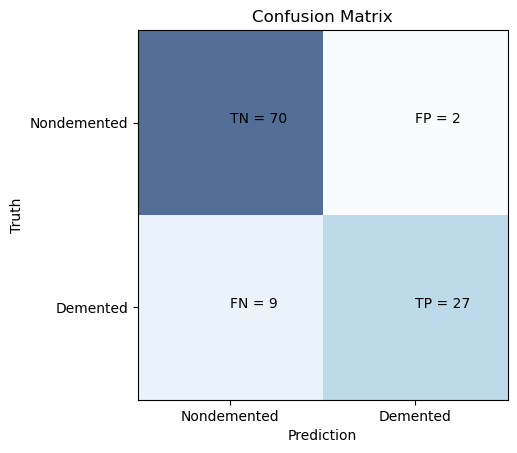

In [274]:
report_performance(svm) 

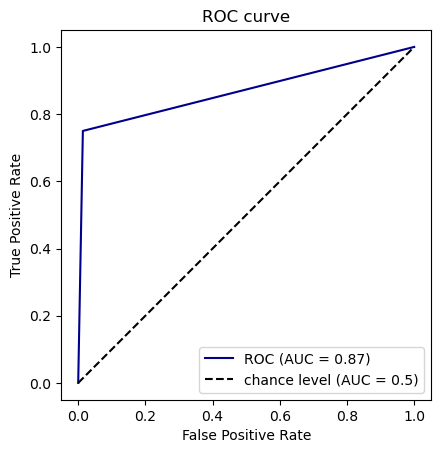

In [277]:
plotroccurve(svm)

# DECISION TREE

In [278]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('clf', DecisionTreeClassifier())  
])
param_grid = {"clf__criterion": ["gini", "entropy"],
              "clf__min_samples_split": [10, 20],
              "clf__max_depth": [3, 5, 10, 20],
              "clf__min_samples_leaf": [30, 100, 300],
              "clf__max_leaf_nodes": [None,2,3,5],
              }

In [280]:
dtclassifier = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
dtclassifier.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 5, 10, 20],
                         'clf__max_leaf_nodes': [None, 2, 3, 5],
                         'clf__min_samples_leaf': [30, 100, 300],
                         'clf__min_samples_split': [10, 20]},
             scoring='accuracy')

In [281]:
dtclassifier.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 3,
 'clf__max_leaf_nodes': None,
 'clf__min_samples_leaf': 100,
 'clf__min_samples_split': 10}

In [282]:
maxdepth= dtclassifier.best_params_.get('clf__max_depth')
min_samplesleaf= dtclassifier.best_params_.get('clf__min_samples_leaf')
min_samplessplit= dtclassifier.best_params_.get('clf__min_samples_split')
criterion_used=dtclassifier.best_params_.get('clf__criterion')

dtree = DecisionTreeClassifier(max_depth=maxdepth, min_samples_leaf=min_samplesleaf, min_samples_split=min_samplessplit, criterion= criterion_used)

In [283]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100, min_samples_split=10)

In [284]:
y_pred = dtree.predict(X_test)
print(dtree.score(X_train,y_train))
print(dtree.score(X_test,y_test))
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

0.8
0.9074074074074074
Accuracy:  0.9074074074074074


In [286]:
kfold = KFold(n_splits=5, shuffle=True, random_state=101)
cv_scores_dt = []
for train_index, test_index in kfold.split(X):
    X_train_fold_dt, X_test_fold_dt = X[train_index], X[test_index]
    y_train_fold_dt, y_test_fold_dt = y[train_index], y[test_index]
    
    dtree.fit(X_train_fold_dt, y_train_fold_dt.ravel())
    
    score = dtree.score(X_test_fold_dt, y_test_fold_dt)
    cv_scores_dt.append(score)
print(cv_scores_dt)

[0.9074074074074074, 0.7222222222222222, 0.8703703703703703, 0.7757009345794392, 0.8317757009345794]


In [288]:
accuracy_test = dtree.score(X_train, y_train)
print("Accuracy on the Train Set:", accuracy_test)

Accuracy on the Train Set: 0.8


In [290]:
accuracy_test = dtree.score(X_test, y_test)
print("Accuracy on the Train Set:", accuracy_test)

Accuracy on the Train Set: 0.9074074074074074


In [334]:
pred_y = dtree.predict(X_test)

In [335]:
accuracy = accuracy_score(y_test, pred_y)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.9074074074074074
Percentage :  90 %


[Text(0.3333333333333333, 0.875, 'x[4] <= 0.014\ngini = 0.478\nsamples = 431\nvalue = [261, 170]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.233\nsamples = 126\nvalue = [17, 109]'),
 Text(0.5, 0.625, 'x[2] <= -0.281\ngini = 0.32\nsamples = 305\nvalue = [244, 61]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.039\nsamples = 101\nvalue = [99, 2]'),
 Text(0.6666666666666666, 0.375, 'x[6] <= -0.061\ngini = 0.411\nsamples = 204\nvalue = [145.0, 59.0]'),
 Text(0.5, 0.125, 'gini = 0.476\nsamples = 100\nvalue = [61, 39]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.311\nsamples = 104\nvalue = [84, 20]')]

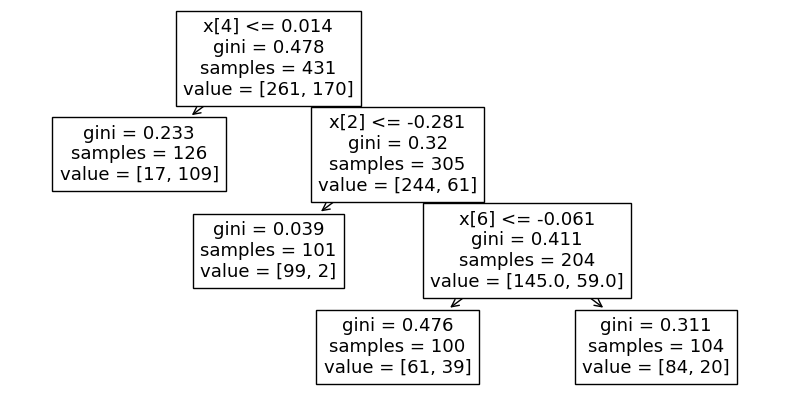

In [291]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plot_tree(dtree)

In [292]:
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
y_test  = y_test.ravel()
results_df_ = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
    
print("\nAcuuracy Of the Model: ",accuracy,"\n\n")
print("Predicted vs Actual:\n")
print(results_df_)


Acuuracy Of the Model:  0.9074074074074074 


Predicted vs Actual:

     Predicted  Actual
0            1       1
1            0       0
2            0       0
3            0       0
4            1       1
..         ...     ...
103          0       0
104          0       0
105          1       0
106          0       0
107          0       0

[108 rows x 2 columns]




Confusion Matrix:
[[70  2]
 [ 8 28]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        72
           1       0.93      0.78      0.85        36

    accuracy                           0.91       108
   macro avg       0.92      0.88      0.89       108
weighted avg       0.91      0.91      0.91       108



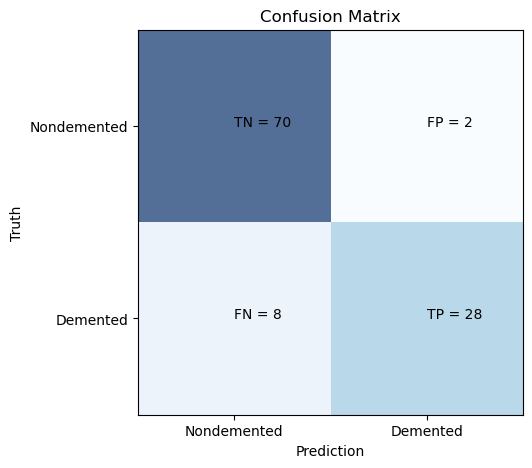

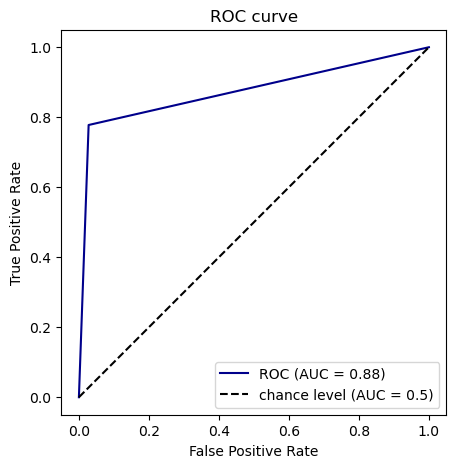

In [293]:
report_performance(dtree) 
plotroccurve(dtree) 

# KNN

In [306]:
Knn = KNeighborsClassifier()

In [309]:
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [310]:
Knn.score(X_train,y_train)

0.8930232558139535

In [311]:
Knn.score(X_test,y_test)

0.9074074074074074

In [312]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan']  
}

grid_search = GridSearchCV(Knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [315]:
Knn = KNeighborsClassifier(metric ='manhattan', n_neighbors= 3, weights= 'distance')
Knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [316]:
Knn.score(X_train,y_train)

1.0

In [317]:
Knn.score(X_test,y_test)

0.9351851851851852

In [327]:
kfold = KFold(n_splits=5, shuffle=True, random_state=201)
cv_scores_dt = []
for train_index, test_index in kfold.split(X):
    X_train_fold_dt, X_test_fold_dt = X[train_index], X[test_index]
    y_train_fold_dt, y_test_fold_dt = y[train_index], y[test_index]
    
    Knn.fit(X_train_fold_dt, y_train_fold_dt.ravel())
    
    score = Knn.score(X_test_fold_dt, y_test_fold_dt)
    cv_scores_dt.append(score)
print(cv_scores_dt)

[0.8888888888888888, 0.8888888888888888, 0.9074074074074074, 0.9626168224299065, 0.9158878504672897]


In [328]:
best_fold_index = cv_scores_dt.index(max(cv_scores_dt))
best_fold_index

3

In [329]:
best_fold_index = cv_scores_dt.index(max(cv_scores_dt))
train_index, test_index = list(kfold.split(X))[best_fold_index]

X_train_best, X_test_best = X[train_index], X[test_index]
y_train_best, y_test_best = y[train_index], y[test_index]
Knn.fit(X_train_best, y_train_best.ravel())

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [330]:
print(len(X_train_best))
print(len(X_test_best))

431
107


In [332]:
accuracy_test = Knn.score(X_train_best, y_train_best)
print("Accuracy on the Train Set:", accuracy_test)

Accuracy on the Train Set: 1.0


In [333]:
accuracy_test = Knn.score(X_test_best, y_test_best)
print("Accuracy on the Train Set:", accuracy_test)

Accuracy on the Train Set: 0.9626168224299065


In [337]:
ypred = Knn.predict(X_test_best)

In [339]:
accuracy = accuracy_score(y_test_best, ypred)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.9626168224299065
Percentage :  96 %


In [340]:
y_pred = Knn.predict(X_test_best)
accuracy = metrics.accuracy_score(y_test_best,y_pred)
y_test_best  = y_test_best.ravel()
results_df_ = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test_best})
    
print("\nAcuuracy Of the Model: ",accuracy,"\n\n")
print("Predicted vs Actual:\n")
print(results_df_)


Acuuracy Of the Model:  0.9626168224299065 


Predicted vs Actual:

     Predicted  Actual
0            0       0
1            0       0
2            0       0
3            1       1
4            0       0
..         ...     ...
102          1       1
103          1       1
104          0       0
105          1       1
106          1       1

[107 rows x 2 columns]




Confusion Matrix:
[[72  0]
 [ 0 36]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        36

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



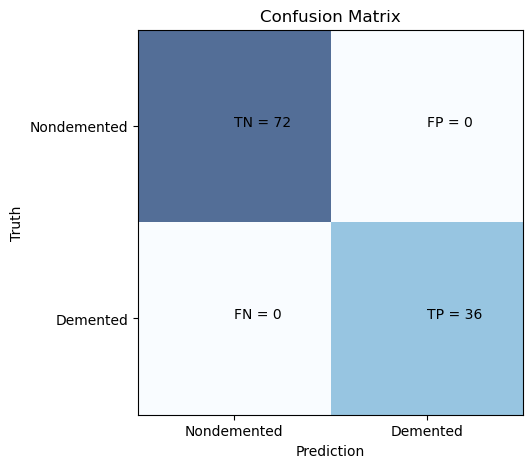

In [342]:
report_performance(Knn)  

In [343]:
def plotroccurve(model,y_test,y_pred):
    RocCurveDisplay.from_predictions(
        y_test,
        y_pred,
        name=f"ROC",
        color="darkblue",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

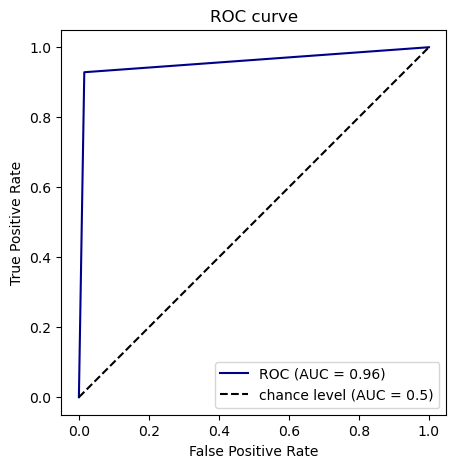

In [346]:
plotroccurve(Knn,y_test_best,ypred)

<Figure size 1000x500 with 0 Axes>

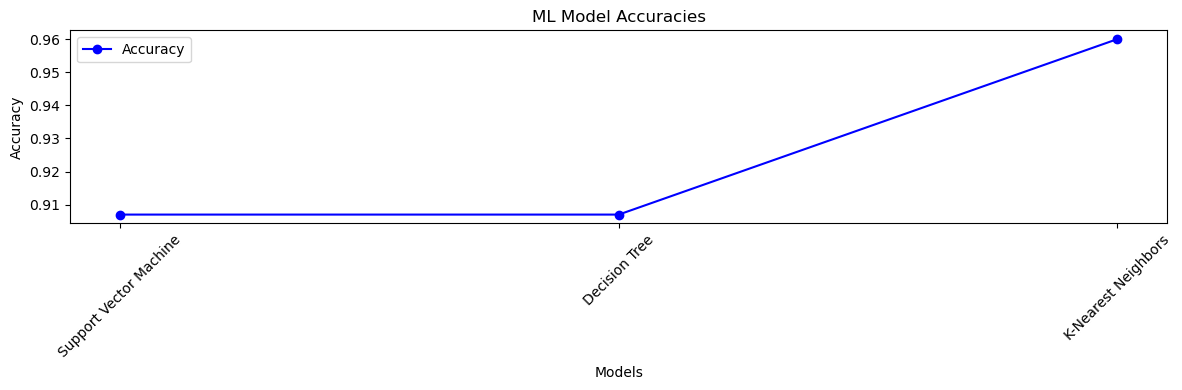

In [351]:
accuracies = {
    "Support Vector Machine": 0.907,
    "Decision Tree": 0.907,
    "K-Nearest Neighbors": 0.96,
}

plt.figure() 
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy')
ax1.plot(list(accuracies.keys()), list(accuracies.values()), marker='o', color='blue', label='Accuracy')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

plt.xticks(rotation=45)
plt.title('ML Model Accuracies')
plt.tight_layout()
plt.show()